<a href="https://colab.research.google.com/github/dudeurv/SAM_MRI/blob/main/MRI_slicing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Nibabel

In [ ]:
!pip -q install nibabel

Importing

In [2]:
import os
import nibabel as nib # used for reading and writing neuroimaging data formats, including NIFTI
import numpy as np # for operations on large arrays and matrices of numeric data.
import matplotlib.pyplot as plt
import cv2 # OpenCV library used for computer vision and image processing tasks

Slice using Nibabel (Practice on slice at index 70)

(512, 512, 144) (512, 512)


True

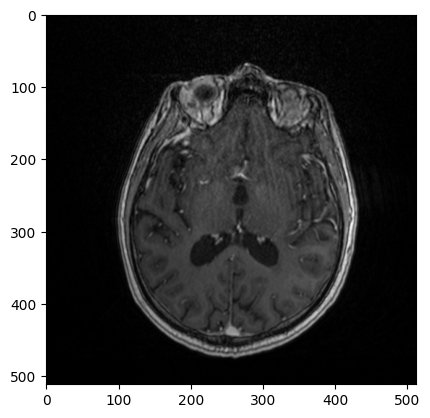

In [ ]:
file_path = 'TSH86_Stealth_t1_2.nii.gz'
img = nib.load(file_path) # load the NIFTI file from the given path
img_array = img.get_fdata() # nibabel function retrieves the image data from the Nifti1Image object and returns it as a numpy array with floating-point data.
print(img_array.shape, img_array[:,:,70].shape) # the dimension of the whole 3D image array and a 2D slice at index 70 depth.
slice70 = np.rot90(img_array[:,:,70]) # the 2D slice at index 70 is rotated by 90 degrees
plt.imshow(slice70, cmap='gray') # slice is displayed in grayscale
cv2.imwrite('slice70.png', slice70) # saves slice as image with filename 'slice70.png'

Slice all using Nibabel

In [3]:
def slicer(input_folder):
    output_folder = f"{input_folder}_slices"
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        filepath = os.path.join(input_folder, filename)
        image = nib.load(filepath)
        array = image.get_fdata()
        depth = array.shape[2]
        for z in range(depth):
            slice = np.rot90(array[:, :, z])
            output_filename = os.path.join(output_folder, f"{filename}_slice{z}.png")
            cv2.imwrite(output_filename, slice)

    print(f"Completed slicing. Images have been saved to {output_folder}.")

# Call the function
slicer("/content/drive/MyDrive/train_valid/BraTS-GLI-00000-000")

Completed slicing. Images have been saved to /content/drive/MyDrive/train_valid/BraTS-GLI-00000-000_slices.
